<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Lecture_04_Component_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [ ]:
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip -O Images.zip
!unzip -o Images.zip

--2022-08-24 19:13:30--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip [following]
--2022-08-24 19:13:30--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3413100 (3.3M) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[===================>]   3

#License Plate Characters Segmentation
The goal is to segment the chars and numbers from a license plate


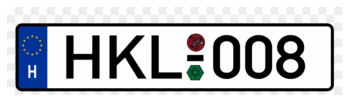

In [ ]:
#read image from disk
img_plate = cv2.imread('Images/placa5.png')
#converts to rgb to better visualize
img_plate = cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB)
plt.imshow(img_plate)
plt.axis('off')
plt.show()

#Connected Component Labelling - Classical Algorithm
* Analyzes the non-zero pixel's neighborhood (foreground)
* Label each connected pixel with a label (1,2,3,4….)

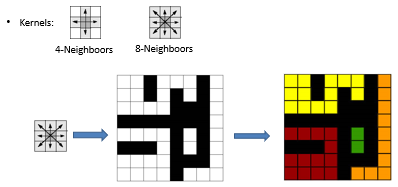

The method is implemented by cv2.connectedComponent() function





#Pre-Processing

First, we must binarize the image to segment the foreground and background.
  * Blurring to reduce brightness changes and other noises
  * Otsu threshold to binarize

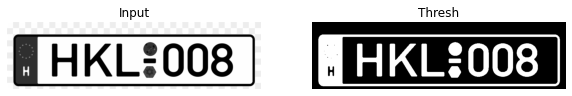

In [ ]:
gray = cv2.cvtColor(img_plate,cv2.COLOR_RGB2GRAY)

gray = cv2.medianBlur(gray,5)

_,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plot_sidebyside([gray,thresh],['Input','Thresh'],colormap='gray',figsize=(10,6))

#The cv2.connectedComponent()
*   Returns the number of labels find
*   The labeled image
*   List of properties of components (top-left, size, area, etc.)



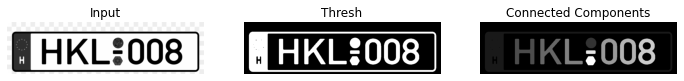

Total Labels: 11
[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(thresh , connectivity , cv2.CV_32S)
plot_sidebyside([gray,thresh,cc_image],['Input','Thresh','Connected Components'],colormap='gray')

print('Total Labels:', num_labels)
print(np.unique(cc_image))

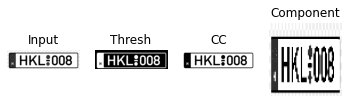

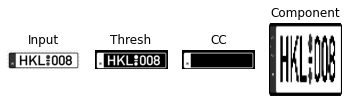

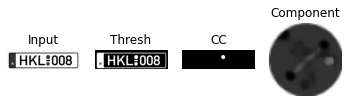

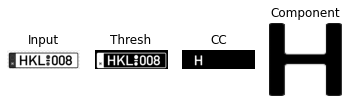

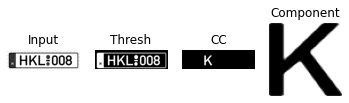

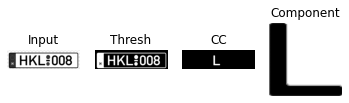

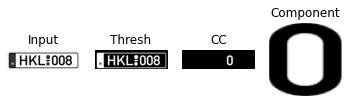

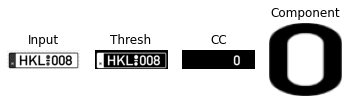

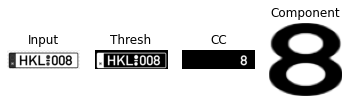

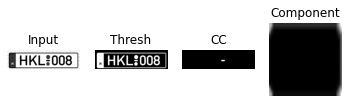

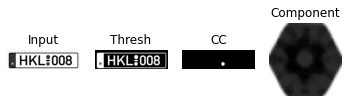

In [ ]:
for i in range(num_labels):
  temp = cc_image.copy()

  temp[cc_image == i] = 255
  temp[cc_image != i] = 0

  x,y,w,h = stats[i][:4]
  area = stats[i][4]
  cx,cy = centroids[i]
  component = gray[y:y+h, x:x+w]
  component = cv2.resize(component,(64,64))
  plot_sidebyside([gray,thresh,temp,component],['Input','Thresh','CC','Component'],colormap='gray',figsize=(6,6))

#Filtering components by size
  We can observe that chars and numbers has a pattern in size (~110 pixels of heigth) that permit to filtering amoung others components.
  Lets, take a look!

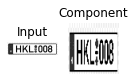

840 220


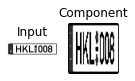

799 170


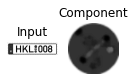

45 45


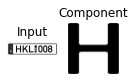

83 108


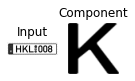

91 108


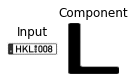

76 108


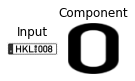

68 110


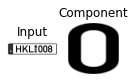

68 110


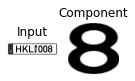

72 110


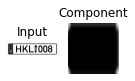

41 15


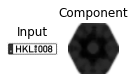

42 38


In [ ]:
for i in range(num_labels):
  temp = cc_image.copy()

  temp[cc_image == i] = 255
  temp[cc_image != i] = 0

  #x,y = top-left coordinates
  #w,h = width and height of bounding box
  x,y,w,h = stats[i][:4]

  #number of foreground pixels
  area = stats[i][4]

  #center of mass (cx,cy)
  cx,cy = centroids[i]

  component = gray[y:y+h, x:x+w]
  component = cv2.resize(component,(64,64))
  plot_sidebyside([gray,component],['Input','Component'],colormap='gray',figsize=(2,2))
  print(w,h)

Adicionamos um 'if' para filtrar apenas as letras e números

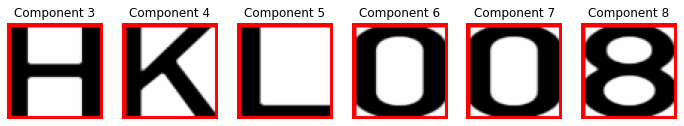

In [ ]:
comp_img = []
comp_str = []

for i in range(num_labels):
  temp = cc_image.copy()

  temp[cc_image == i] = 255
  temp[cc_image != i] = 0

  x,y,w,h = stats[i][:4]
  area = stats[i][4]
  cx,cy = centroids[i]


  if h > 90 and h < 130:
    component = gray[y:y+h, x:x+w]
    h,w = component.shape

    component = cv2.resize(component,(64,64))
    component = cv2.cvtColor(component,cv2.COLOR_GRAY2BGR)
    cv2.rectangle(component,(0,0),(64,64),(255,0,0),thickness=3)
    comp_img.append(component)
    comp_str.append('Component ' + str(i))


plot_sidebyside(comp_img,comp_str,colormap='gray')



Now it's your turn! Apply this approach to other license plates.

* Challenge 01: Develop an algorithm that generalizes across various plates. Focus on handling size normalization, noise reduction, and similar preprocessing steps.

* Challenge 02: Classification Challenge: Determine the character.

* Tip: Consider implementing an approach that calculates the difference between the extracted character and a reference dataset of characters. Identify the closest match to determine the label. Explore Template Matching techniques to assist in this process.

* Strategy: Create a reference dataset containing all possible characters, which can be generated using cv2.putText. For each character extracted from a license plate, compare it against this reference dataset. The character from the reference set that is closest in similarity will be assigned as the label.

Link for dataset:
https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip




In [ ]:
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip -O dataset.zip
!unzip dataset.zip


--2023-08-21 22:46:45--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip [following]
--2023-08-21 22:46:45--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2004%20-%20Finding%20Components/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2220323 (2.1M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]